# **AdaBoost Classifier Project**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
df = pd.read_csv("../Dataset/Travel.csv")

In [17]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [18]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


# Cleaning Data

### Checking Categories and Handling it

In [19]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [20]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [21]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

✅ Replace 3 values at once

Suppose we want:

"Fe Male" → "Female"

"M" → "Male"

"F" → "Female"

df["Gender"] = df["Gender"].replace({
    "Fe Male": "Female",
    "M": "Male",
    "F": "Female"
})

In [23]:
df['Gender'].replace('Fe Male', 'Female', inplace=True)

In [24]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [25]:
df['ProdTaken'].value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

## Checking NUll Values

In [26]:
# we are finding the percentage of missing values

features_with_nan = [feature  for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing valus')

Age 4.62357 % missing valus
TypeofContact 0.51146 % missing valus
DurationOfPitch 5.13502 % missing valus
NumberOfFollowups 0.92062 % missing valus
PreferredPropertyStar 0.53191 % missing valus
NumberOfTrips 2.86416 % missing valus
NumberOfChildrenVisiting 1.35025 % missing valus
MonthlyIncome 4.76678 % missing valus


# Visualazing Columns and NaN
### Filled bar is non NaN values

<Axes: >

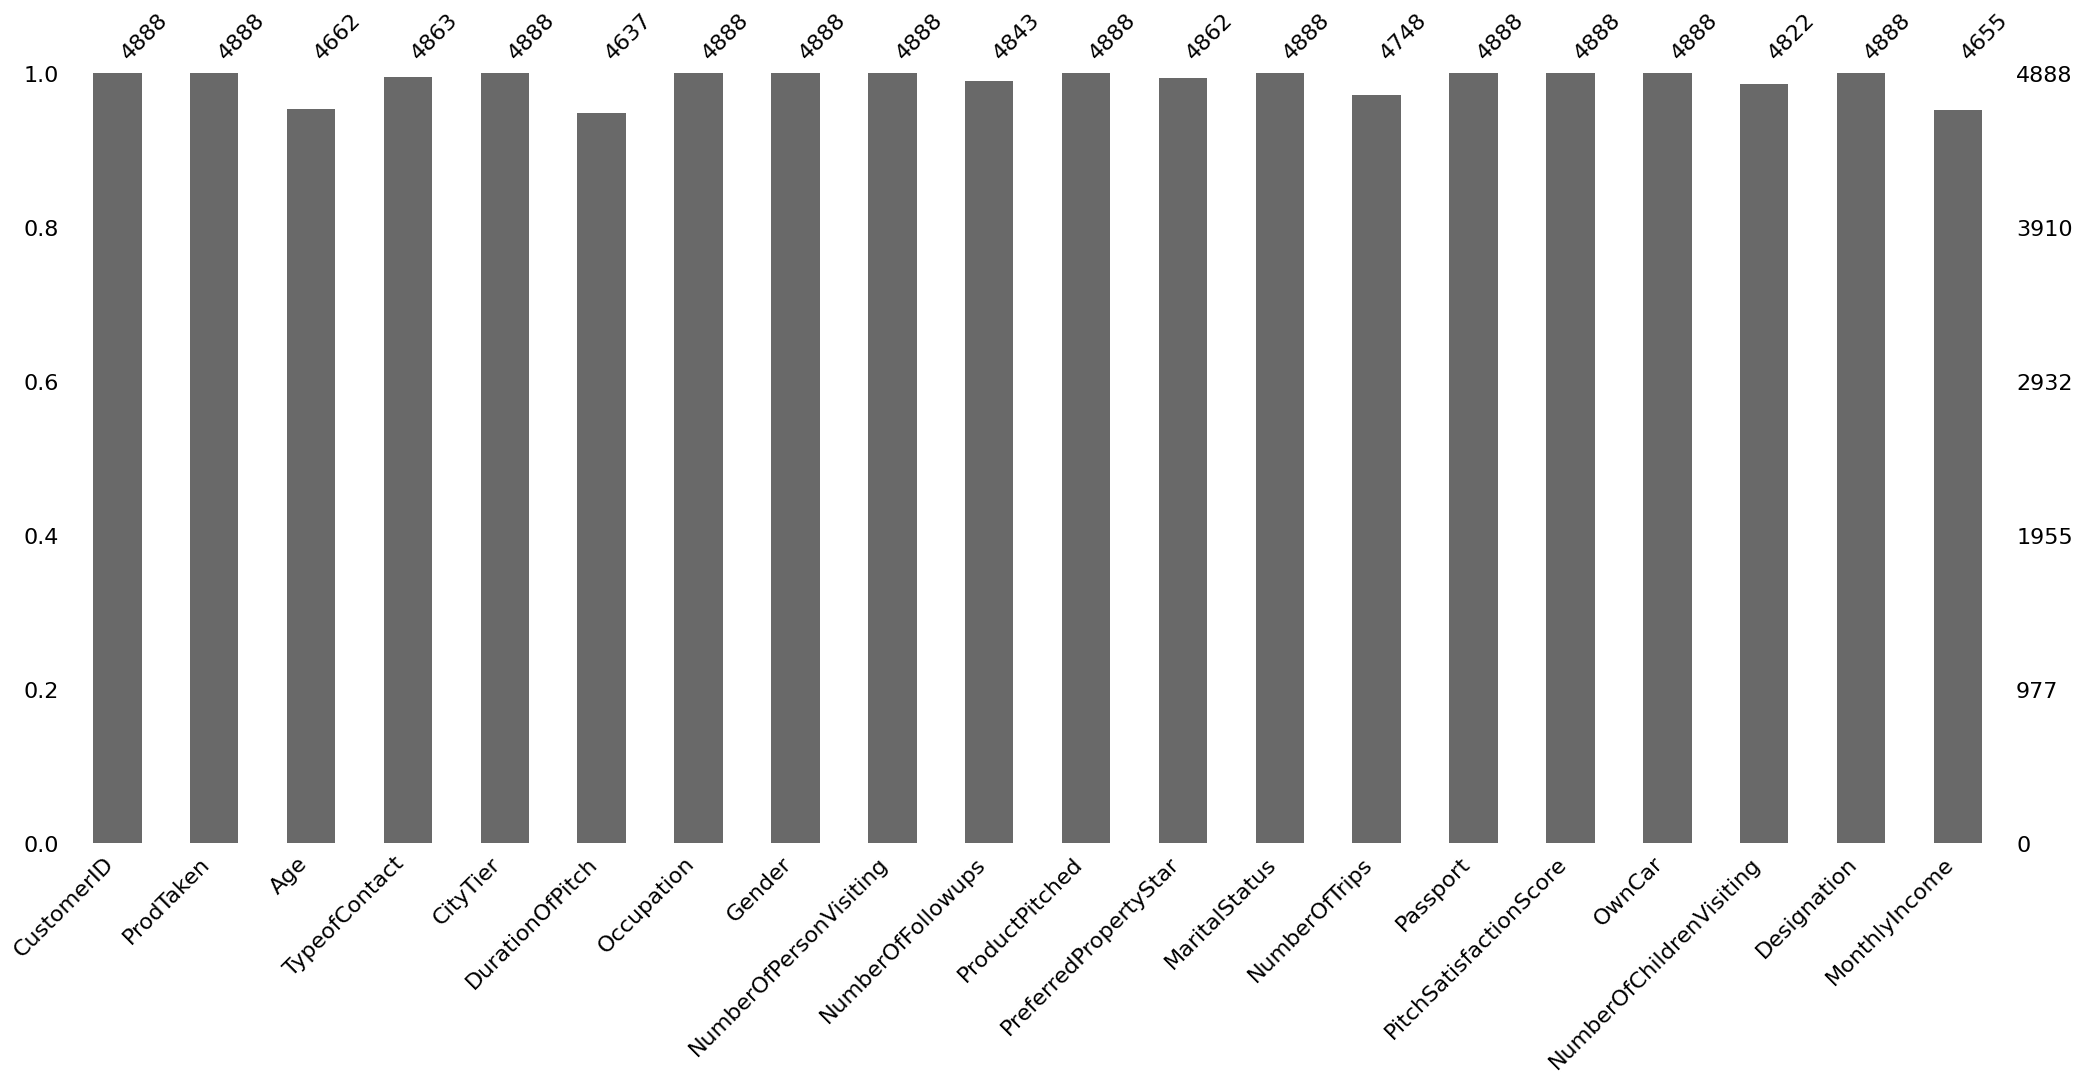

In [27]:

import missingno as msno
msno.bar(df)


In [28]:
# Statistical Summary of Numerical Feature of NaN

df[features_with_nan].select_dtypes(exclude = 'O').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Handling Missing Values

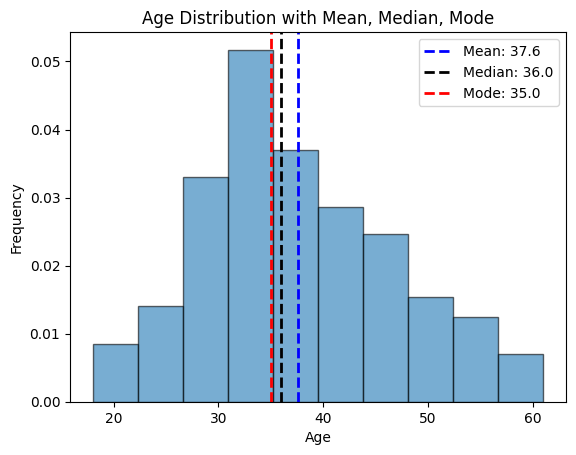

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Basic histogram
plt.hist(df['Age'], bins=10, edgecolor='black', alpha=0.6, density= True)

# Calculating values
mean_val = np.mean(df['Age']) # df['Age'].mean()
# median_val = np.median(df['Age'])
median_val = df['Age'].median()
mode_val = stats.mode(df['Age'], keepdims=True)[0][0] # mod_val = df['Age'].mode()[0]

# Add vertical lines
plt.axvline(mean_val, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.1f}')
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.1f}')

# Title and labels
plt.title('Age Distribution with Mean, Median, Mode')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


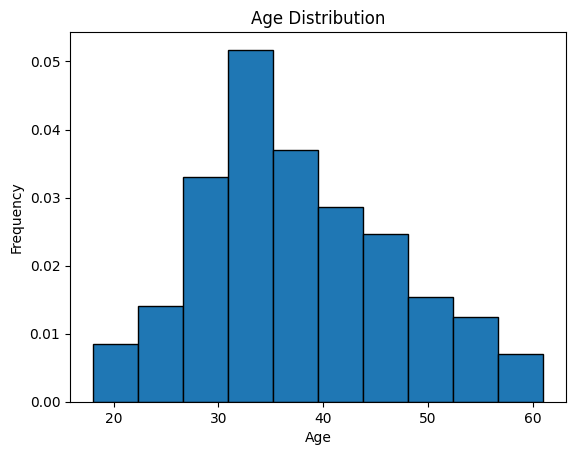

In [30]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=10, edgecolor='black' , density=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


1️⃣ Intuition – What is a KDE Plot?

KDE = Kernel Density Estimation.

It’s a smoothed version of a histogram that shows the probability density of a continuous variable.

Instead of showing counts (like a histogram), it shows a smooth curve that estimates the distribution of data.

👉 Think of it as:

Histogram = blocky bars 📊

KDE = smooth mountain-like curve ⛰️

2️⃣ Math (Conceptual Formula)

Kernel Density Estimation is:

𝑓
^
(
𝑥
)
=
1
𝑛
ℎ
∑
𝑖
=
1
𝑛
𝐾
(
𝑥
−
𝑥
𝑖
ℎ
)
f
^
	​

(x)=
nh
1
	​

i=1
∑
n
	​

K(
h
x−x
i
	​

	​

)

Where:

𝑛
n = number of data points

ℎ
h = bandwidth (controls smoothness)

𝐾
K = kernel function (usually Gaussian bell curve)

𝑥
𝑖
x
i
	​

 = data points

👉 Each data point contributes a small "bump" (kernel), and KDE adds them all to form a smooth curve.

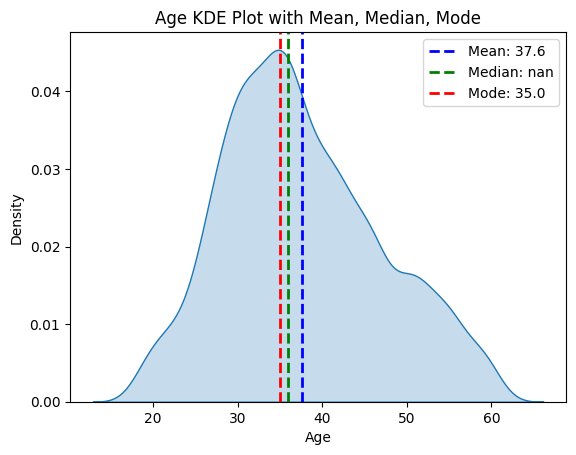

In [31]:
import seaborn as sns

# KDE plot
sns.kdeplot(df['Age'], shade=True)

# Calculations (same as above)
mean_val = np.mean(df['Age'])
median_val = np.median(df['Age'])
mode_val = stats.mode(df['Age'], keepdims=True)[0][0]

# Vertical lines
plt.axvline(mean_val, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.1f}')
plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.1f}')

plt.title('Age KDE Plot with Mean, Median, Mode')
plt.xlabel('Age')
plt.legend()
plt.show()


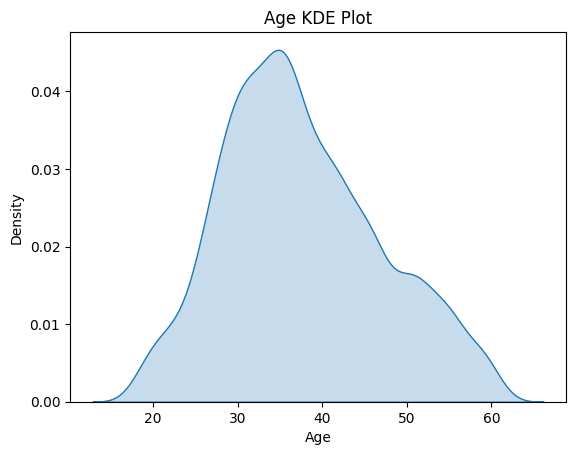

In [32]:
sns.kdeplot(df['Age'], shade=True)

plt.title('Age KDE Plot')
plt.xlabel('Age')
plt.show()


In [33]:
df.Age.fillna(df.Age.median() , inplace= True)

In [34]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0] , inplace = True)

In [35]:
df.DurationOfPitch.fillna(df.DurationOfPitch.median() , inplace=True)

In [36]:
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0] , inplace= True)

In [37]:
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace= True)

In [38]:
df.NumberOfTrips.fillna(df.NumberOfTrips.median() , inplace= True)

In [39]:
df.NumberOfChildrenVisiting.fillna( df.NumberOfChildrenVisiting.mode()[0] , inplace=True)

In [40]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median() , inplace= True)

# Drop Extra Columns

In [41]:
df.drop(columns=['CustomerID'] , inplace= True)

# Feature Engineering

## Feature Extraction

In [42]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']

In [43]:
df.drop(columns= ['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'] , inplace= True)

### Numerical Feaature

In [44]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('Number of Numerical Features ' , len(num_features))

Number of Numerical Features  12


In [45]:
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisiting']

In [46]:
# Or use this method works same
# df.select_dtypes(exclude= 'O').columnsds
# len(df.select_dtypes(exclude= 'O').columns)


### Categorical Features

In [47]:
cat_features = [feature for feataure in df.columns if df[feataure].dtype == 'O']
print('Number of Categorical Features ' , len(cat_features))

Number of Categorical Features  6


### Discrete Features
#### It have more number of categories then categorical features

In [48]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25 ]
print('Num of Discrete Features' , len(discrete_features))


Num of Discrete Features 9


In [49]:
continous_features = [ feature for feature in num_features if feature not in discrete_features ]
print('No of continous features ', len(continous_features))

No of continous features  3


# Independent and Dependent Feauture

In [50]:
X = df.drop(columns= [ 'ProdTaken'] , axis= 1)

In [51]:
y = df['ProdTaken']

<Axes: xlabel='ProdTaken', ylabel='count'>

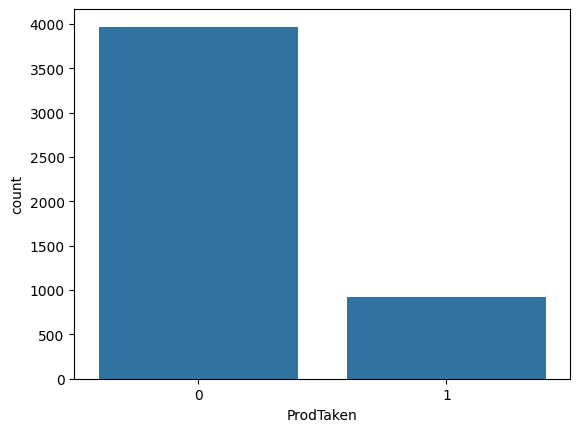

In [52]:
sns.countplot(x = y)

# Tain test split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.20 , random_state= 42)

In [55]:
len(X_train) # Training Samples

3910

In [56]:
len(X_test) # Testing Samples

978

### **Separate Categorical and Numerical Features**

In [57]:
cat_features = X.select_dtypes(include= 'O').columns
num_features = X.select_dtypes(exclude= 'O').columns


In [58]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

In [59]:
numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder(drop= 'first')


### **ColumnTransformer**
- It is used  to join d/f preprocessing to perform it in a sequence

In [60]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer , cat_features),
        ("StandardScaler", numeric_transformer , num_features)
    ]
)

In [61]:
X_train = preprocessor.fit_transform(X_train)

In [62]:
X_test = preprocessor.transform(X_test)

In [63]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


# **AdaBoost Classier Training**

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [65]:
models = {
    "Logistic Reg"  : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "AdaBoost":       AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train , y_train) # train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Training set Performance
    model_train_accuracy = accuracy_score(y_train ,  y_train_pred)
    model_test_accuracy  = accuracy_score(y_test , y_test_pred)


    print(list(models.keys())[i])
    
    print('Model Performance for Training set')
    print(f"Training Accuracy : {model_train_accuracy}")

    print("-" * 50)

    print("\nModel Test Accuracy")
    print(f"Model Test Accuracy : {model_test_accuracy}")
    print("\n ======================")

Logistic Reg
Model Performance for Training set
Training Accuracy : 0.8460358056265984
--------------------------------------------------

Model Test Accuracy
Model Test Accuracy : 0.83640081799591

Random Forest
Model Performance for Training set
Training Accuracy : 1.0
--------------------------------------------------

Model Test Accuracy
Model Test Accuracy : 0.9304703476482618

Decision Tree
Model Performance for Training set
Training Accuracy : 1.0
--------------------------------------------------

Model Test Accuracy
Model Test Accuracy : 0.918200408997955

AdaBoost
Model Performance for Training set
Training Accuracy : 0.8478260869565217
--------------------------------------------------

Model Test Accuracy
Model Test Accuracy : 0.8353783231083844

Gradient Boost
Model Performance for Training set
Training Accuracy : 0.8938618925831202
--------------------------------------------------

Model Test Accuracy
Model Test Accuracy : 0.8588957055214724



In [66]:
# for name , model in models.item():
#     model.fit(X_train, y_train)

#     # Make Predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred  = model.predict(X_test)

#     # Training set Performance
#     model_train_accuracy = accuracy_score(y_train ,  y_train_pred)
#     model_test_accuracy  = accuracy_score(y_test , y_test_pred)


#     print(f"Model Name :  {name}")
    
#     print('Model Performance for Training set')
#     print(f"Training Accuracy : {model_train_accuracy}")

#     print("\nModel Test Accuracy")
#     print(f"Model Test Accuracy : {model_test_accuracy}")
#     print("\n")
#     print("=" * 50) 

    

# **Hyperparamter Training**

In [67]:
rf_params = {
    "max_depth" : [5, 8, 15, None, 10],
    "max_features" : [5, 7, "auto", 8],
    "min_samples_split" : [2, 8, 15, 20],
    "n_estimators" : [100, 200, 500, 1000]
}

ab_params = {
    "n_estimators": [50, 60, 70, 80, 90],
    "algorithm" : ["SAMME", "SAMME.R"]
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("AB", AdaBoostClassifier(), ab_params),
]

In [70]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                param_distributions = params,
                                n_iter = 30,
                                cv = 3,
                                verbose= 2,
                                n_jobs = -1)
    random.fit(X_train , y_train)
    model_param[name] = random.best_estimator_


for model_name in model_param:
    print(f"----------------Best Params for  {model_name} -----------")
    print(model_param[model_name])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
----------------Best Params for  RF -----------
RandomForestClassifier(max_features=7, n_estimators=500)
----------------Best Params for  AB -----------
AdaBoostClassifier(algorithm='SAMME', n_estimators=80)


## **Deciding from best Models**

In [73]:
models = {
    "RF" : RandomForestClassifier(max_depth= 15, max_features= 8),
    "AB" : AdaBoostClassifier( algorithm= 'SAMME', n_estimators= 80)
}

for name, model in models.items():
    # Train Model
    model.fit(X_train, y_train)

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # Training set Performance
    model_train_accuracy = accuracy_score(y_train ,  y_train_pred)
    model_test_accuracy  = accuracy_score(y_test , y_test_pred)


    print(f'Model Name : {name}')
    
    print('Model Performance for Training set')
    print(f"Training Accuracy : {model_train_accuracy}")
    print("-" * 50)

    print("Model Performance for Testing set" )
    print(f"Model Test Accuracy : {model_test_accuracy}")
    print("\n")
    print("=" * 50)

Model Name : RF
Model Performance for Training set
Training Accuracy : 0.9987212276214834
--------------------------------------------------
Model Performance for Testing set
Model Test Accuracy : 0.9386503067484663


Model Name : AB
Model Performance for Training set
Training Accuracy : 0.8465473145780051
--------------------------------------------------
Model Performance for Testing set
Model Test Accuracy : 0.83640081799591




## 📊 Performance Summary

| Model | Training Accuracy | Testing Accuracy | Gap (Overfitting Indicator) |
|-------|-------------------|------------------|-----------------------------|
| RF    | **0.999**         | 0.928            | High (≈ 7%)                 |
| AB    | 0.847             | 0.836            | Low (≈ 1%)                  |

---


###  Random Forest (RF)

**Pros:**
- Very high test accuracy (92.8%)
- Strong learner, good for complex patterns

**Cons:**
- Overfitting risk: Training accuracy is nearly perfect
- May not generalize well to unseen data unless regularized

---

###  AdaBoost (AB)

**Pros:**
- Balanced performance: training and testing scores are close
- More interpretable and stable

**Cons:**
- Slightly lower test accuracy (83.6%)
- May underfit if not tuned properly

---


## **What Is Cross-Validation?**
Instead of a single train-test split, K-Fold Cross-Validation divides your data into K subsets (folds). The model trains on K-1 folds and tests on the remaining fold — repeating this K times.

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
models = {
    "RF" : RandomForestClassifier(max_depth= 15, max_features= 8),
    "AB" : AdaBoostClassifier( algorithm= 'SAMME', n_estimators= 80)
}

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv= 10, scoring="accuracy")
    print(f"Model Name : {name}")
    print(f"cv score : {score}")
    print(f"=" * 50)
    print('\n')

Model Name : RF
cv score : [0.94117647 0.91304348 0.92071611 0.94373402 0.91560102 0.91815857
 0.92327366 0.92327366 0.9258312  0.93606138]


Model Name : AB
cv score : [0.83375959 0.84143223 0.8286445  0.84143223 0.83887468 0.84910486
 0.85677749 0.87468031 0.83887468 0.84654731]




# 📊 3. Visualize Performance
- Plot the scores for each fold:

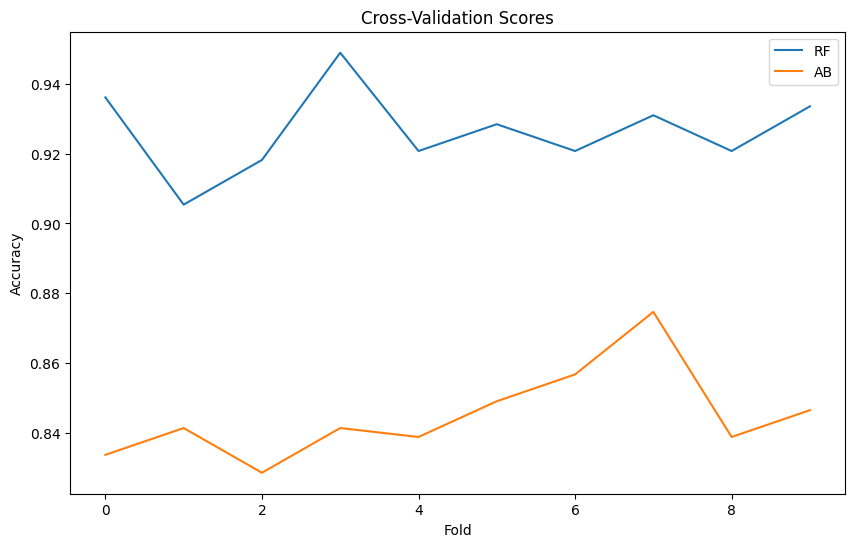

In [78]:
# 📈 Plotting
plt.figure(figsize=(10, 6))

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    plt.plot(score, label=name)


plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Scores")
plt.legend()
plt.show()

## 📊 Model Comparison Summary

| Metric           | Random Forest (RF) | AdaBoost (AB)  |
|------------------|--------------------|----------------|
| Mean Accuracy    | **0.9261**         | 0.8450         |
| Std. Dev         | 0.0109             | 0.0124         |
| Accuracy Range   | 0.9156–0.9463      | 0.8286–0.8747  |

---

## 🔍 Interpretation

### ✅ Random Forest (RF)
- Higher mean accuracy: ~8% better than AB  
- Lower variance: More consistent across folds  
- Tighter range: Indicates strong generalization  

### ⚠️ AdaBoost (AB)
- Lower mean accuracy  
- Slightly higher variance  
- Wider range: Less predictable performance  

---

## 🧠 Decision Logic

If your goal is:
- **Best predictive performance** → ✅ **Choose RF**
- **Model simplicity or interpretability** → AB might be easier to explain, but it sacrifices accuracy


In [ ]:
from sklearn.model_selection import cross_validate

models = {
    "RF" : RandomForestClassifier(max_depth= 15, max_features= 8),
    "AB" : AdaBoostClassifier( algorithm= 'SAMME', n_estimators= 80)
}

scoring = ['accuracy', 'precision_weighted', 'recall_weighted']

for name, model in models.items():
    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
   
    print(f"Model Name : {name}")
    print(" Accuracy:", results['test_accuracy'].mean())
    print(" Precision:", results['test_precision_weighted'].mean())
    print(" Recall:", results['test_recall_weighted'].mean())
    print(f"=" * 50)
    print('\n')

Model Name : RF
 Accuracy: 0.919693094629156
 Precision: 0.9188876024701067
 Recall: 0.919693094629156


Model Name : AB
 Accuracy: 0.8462915601023019
 Precision: 0.8347241564129876
 Recall: 0.8462915601023019


